In [1]:
#Importação do pandas e matplotlib para analise de exploração de dados
from pandas import read_csv, concat
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Fazendo a leitura e carregamento dos dados e verificando suas dimenões 
dados_treino = read_csv('projeto4_telecom_treino.csv')
dados_teste = read_csv('projeto4_telecom_teste.csv')
print('Dimensões dados de treino (linhas, colunas):', dados_treino.shape, '\nDimensões dados de teste (linhas, colunas):',  dados_teste.shape)

Dimensões dados de treino (linhas, colunas): (3333, 21) 
Dimensões dados de teste (linhas, colunas): (1667, 21)


In [3]:
#Conhecendo os dados
dados_treino.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
dados_teste.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,HI,101,area_code_510,no,no,0,70.9,123,12.05,...,73,18.01,236.0,73,10.62,10.6,3,2.86,3,no
1,2,MT,137,area_code_510,no,no,0,223.6,86,38.01,...,139,20.81,94.2,81,4.24,9.5,7,2.57,0,no
2,3,OH,103,area_code_408,no,yes,29,294.7,95,50.10,...,105,20.17,300.3,127,13.51,13.7,6,3.70,1,no
3,4,NM,99,area_code_415,no,no,0,216.8,123,36.86,...,88,10.74,220.6,82,9.93,15.7,2,4.24,1,no
4,5,SC,108,area_code_415,no,no,0,197.4,78,33.56,...,101,10.54,204.5,107,9.20,7.7,4,2.08,2,no


In [5]:
#Juntando os dataframes 
dados = concat([dados_treino, dados_teste])

In [6]:
#Removendo a coluna Unnamed: 0
dados.drop(axis=1, columns='Unnamed: 0', inplace=True)

In [7]:
dados.shape

(5000, 20)

In [8]:
#Verificando os tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 20 columns):
state                            5000 non-null object
account_length                   5000 non-null int64
area_code                        5000 non-null object
international_plan               5000 non-null object
voice_mail_plan                  5000 non-null object
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               5000 non-null float64
total_intl_calls           

In [9]:
#Pacote para veificação de tipos no pandas
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

In [10]:
#Separando as colunas do tipo string
columns_string=[]
for tp in dados.columns:
    if(is_string_dtype(dados[tp])):
        columns_string.append(tp)
columns_string

['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']

In [11]:
#Valores possíveis para cada coluna string para avaliar a possibilidade de conversão em numerico
for col in columns_string:
    print(col, dados[col].unique())

state ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
area_code ['area_code_415' 'area_code_408' 'area_code_510']
international_plan ['no' 'yes']
voice_mail_plan ['yes' 'no']
churn ['no' 'yes']


In [12]:
#Verificando o numero de valores unicos para as variaveis do tipo string
dados[columns_string].nunique()

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
churn                  2
dtype: int64

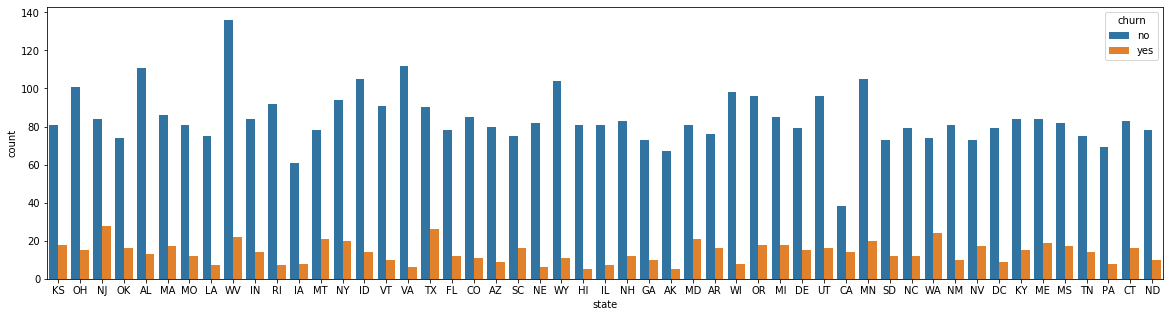

In [13]:
#verificando a quantidade de churn por estado
import seaborn as sns
plt.figure(figsize=(20,5))
sns.countplot('state',  data=dados, hue='churn' )
plt.show()

In [14]:
#Copiando os dataframes para realizar o pre-processamento
df_to_pre_pro = dados.copy()

In [15]:
#Verificando as medidas de tendencia central do dataframe
df_to_pre_pro.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [16]:
#Varificando a presença de dados missing
df_to_pre_pro.isna().any()

state                            False
account_length                   False
area_code                        False
international_plan               False
voice_mail_plan                  False
number_vmail_messages            False
total_day_minutes                False
total_day_calls                  False
total_day_charge                 False
total_eve_minutes                False
total_eve_calls                  False
total_eve_charge                 False
total_night_minutes              False
total_night_calls                False
total_night_charge               False
total_intl_minutes               False
total_intl_calls                 False
total_intl_charge                False
number_customer_service_calls    False
churn                            False
dtype: bool

In [17]:
#Função para transformar as variaveis do tipo string em numerica para utilização pelos algoritmos de ML
def convertColumnsStringToNumber(df):  
    #Primeiro ordenar a variavel state para que cada estado receba um valor numerico em ordem ascendente
    states = df['state'].sort_values().unique()
    #depois criando um dicionario com o respectivo valor para cada estado
    dic_state = dict(zip(states, range(len(states))))
    #Mapear o referido dicionario para o valor de cada estado na coluna
    df['state'] = df['state'].map(dic_state)

    #Transformando as demais colunas com base nos valores possiveis de cada uma
    df['area_code'] = df['area_code'].map({'area_code_415':0 , 'area_code_408':1 , 'area_code_510':2})
    df['international_plan'] = df['international_plan'].map({'no' : 0 , 'yes' : 1})
    df['voice_mail_plan'] = df['voice_mail_plan'].map({'no' : 0 , 'yes' : 1})
    df['churn'] = df['churn'].map({'no' : 0 , 'yes' : 1})
    return df

In [18]:
#Convertendo as colunas string para number 
df_to_pre_pro =  convertColumnsStringToNumber(df_to_pre_pro)

In [19]:
df_to_pre_pro.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,16,128,0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,0,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,0,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,1,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,0,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,24,147,0,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,18,117,1,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,49,141,0,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


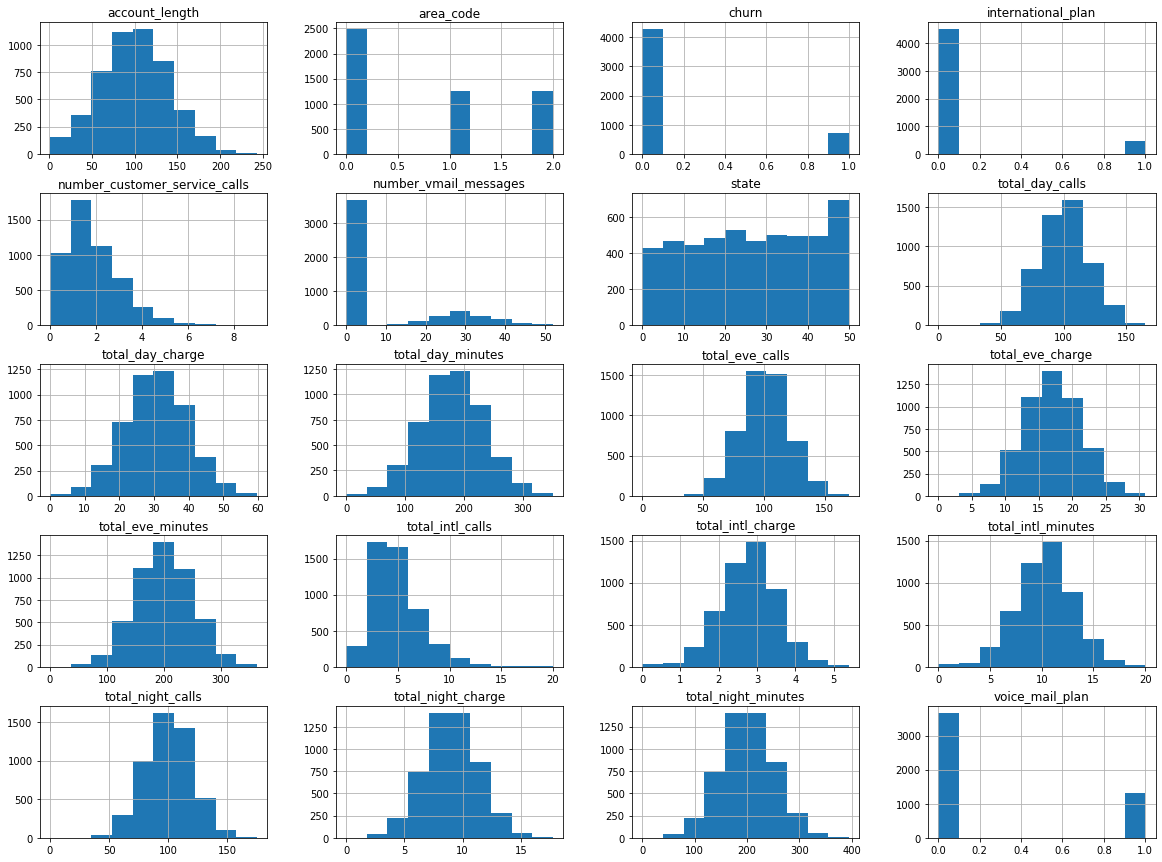

In [20]:
#Verificando distribuição dos dados
df_to_pre_pro.hist(figsize=(20,15))
plt.show()

In [21]:
df_to_pre_pro.columns.values

array(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'], dtype=object)

In [22]:
# Obtendo a Correlação das variáveis com a variavel target
dic_corr={}
for col in df_to_pre_pro.columns.values:
    dic_corr[col]=df_to_pre_pro[['churn', col]].corr().iloc[0,1]

In [23]:
#Correlação ordenada
corr_columns= sorted(dic_corr.items(), key= lambda cv: (cv[1], cv[0]))   

In [24]:
#Imprimindo as correlações com a vaiavel target
#Existem colinearidades entre os campos que terminam em ...charge com os respectivos que terminam em ...minutes
corr_columns

[('voice_mail_plan', -0.11069825633641345),
 ('number_vmail_messages', -0.09763335208851429),
 ('total_intl_calls', -0.04689251354932017),
 ('total_night_calls', -0.006985589814210759),
 ('total_eve_calls', -0.006284071204129774),
 ('state', 0.006946414438818262),
 ('area_code', 0.010125575561475867),
 ('total_day_calls', 0.016129708552931356),
 ('account_length', 0.02120345168693954),
 ('total_night_charge', 0.04567252950480924),
 ('total_night_minutes', 0.04567672039250754),
 ('total_intl_charge', 0.06327531843444671),
 ('total_intl_minutes', 0.06328488783987794),
 ('total_eve_charge', 0.08928223532043096),
 ('total_eve_minutes', 0.08928848603793009),
 ('total_day_charge', 0.20769977695633482),
 ('total_day_minutes', 0.20770519477847882),
 ('number_customer_service_calls', 0.21256404655943983),
 ('international_plan', 0.2591226454643956),
 ('churn', 1.0)]

In [25]:
#Removendo as respectivas colunas colineares
df_to_pre_pro = df_to_pre_pro.drop(['total_night_charge', 'total_intl_charge', 'total_eve_charge', 'total_day_charge'], axis=1)

In [26]:
df_to_pre_pro.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,16,128,0,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,35,107,0,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,31,137,0,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,35,84,1,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,36,75,0,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


In [27]:
#Nova dimensão do dataset
df_to_pre_pro.shape

(5000, 16)

In [28]:
#Normalizando os dados
#Transformando os dados para a mesma escala (entre 0 e 1)

from sklearn.preprocessing import MinMaxScaler

# Separando o array em componentes de input (X) e output (Y) target
X = df_to_pre_pro.values[: , 0:15]
Y = df_to_pre_pro.values[: , 15]

# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

# Sumarizando os dados transformados
print("Dados Originais: \n\n", df_to_pre_pro.values)
print("\nDados Normalizados: \n\n", rescaledX)

Dados Originais: 

 [[ 16. 128.   0. ...   3.   1.   0.]
 [ 35. 107.   0. ...   3.   1.   0.]
 [ 31. 137.   0. ...   5.   0.   0.]
 ...
 [  7.  61.   0. ...   4.   1.   0.]
 [  7. 109.   2. ...   6.   0.   0.]
 [ 46.  86.   0. ...  16.   0.   0.]]

Dados Normalizados: 

 [[0.32       0.52479339 0.         ... 0.5        0.15       0.11111111]
 [0.7        0.43801653 0.         ... 0.685      0.15       0.11111111]
 [0.62       0.56198347 0.         ... 0.61       0.25       0.        ]
 ...
 [0.14       0.24793388 0.         ... 0.68       0.2        0.11111111]
 [0.14       0.44628099 1.         ... 0.425      0.3        0.        ]
 [0.92       0.35123967 0.         ... 0.465      0.8        0.        ]]


In [29]:
#Importando o modelo que será usado para treinamento
from sklearn.linear_model import LogisticRegression

In [30]:
# Avaliação usando dados de treino e de teste
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Definindo o tamanho das amostras
teste_size = 0.35

#Seed que será utilizado pelos modelos gerados
seed = 9

# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo1 = LogisticRegression()

# Treinamento do modelo
modelo1.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo1.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))
print()

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = modelo1.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)
# Imprimindo a Confusion Matrix
print('Confusion Matrix:\n', matrix)
print()

#Probablidade de casse classe
predict_prob = modelo1.predict_proba(X)
print('Probabilidade de cada classe:\n\n', predict_prob*100)

Acurácia nos Dados de Teste: 86.514%

Confusion Matrix:
 [[1468   40]
 [ 196   46]]

Probabilidade de cada classe:

 [[90.75076735  9.24923265]
 [97.25352529  2.74647471]
 [94.18679781  5.81320219]
 ...
 [95.54581894  4.45418106]
 [94.91727293  5.08272707]
 [99.61919594  0.38080406]]


In [31]:
#Com modelo com dados normalizados - Melhor Modelo!!!
# Criando os conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(rescaledX, Y, test_size = teste_size, random_state = seed)

# Criação do modelo
modelo2 = LogisticRegression()

# Treinamento do modelo
modelo2.fit(X_treino, Y_treino)

# Score do modelo nos dados de teste
result = modelo2.score(X_teste, Y_teste)
print("Acurácia nos Dados de Teste: %.3f%%" % (result * 100.0))
print()

# Fazendo as previsões e construindo a Confusion Matrix
previsoes = modelo2.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)
# Imprimindo a Confusion Matrix
print('Confusion Matrix:\n', matrix)
print()

#Probablidade de cada classe com base nas previsoes com os dados de teste
predict_prob = modelo2.predict_proba(X_teste)
print('Probabilidade de cada classe:\n\n', predict_prob*100)

Acurácia nos Dados de Teste: 86.800%

Confusion Matrix:
 [[1477   31]
 [ 200   42]]

Probabilidade de cada classe:

 [[87.7109199  12.2890801 ]
 [99.54657123  0.45342877]
 [98.29815984  1.70184016]
 ...
 [91.44891977  8.55108023]
 [93.42093459  6.57906541]
 [94.85870435  5.14129565]]


In [32]:
#Criando um modelo de Regressão Logistica com KFold - Aqui o modelo não apresentou melhora quando comparado ao modelo com dados normalizados
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Definindo os valores para o número de folds
num_folds = 20

# Separando os dados em folds
kfold = KFold(num_folds, True, random_state = seed)

# Criando o modelo
modelo3 = LogisticRegression()

# Cross Validation
resultado = cross_val_score(modelo3, df_to_pre_pro.iloc[:,0:15], df_to_pre_pro.churn, cv = kfold)

# Print do resultado
print(resultado*100)
print("Acurácia média: %.3f" % (resultado.mean() * 100))

[84.8 86.4 86.4 90.  83.6 87.2 88.4 87.2 86.4 84.4 84.8 85.6 89.6 85.2
 86.4 82.8 86.4 84.  90.  89.2]
Acurácia média: 86.440


In [33]:
#Verificando o modelo com Kfold com os dados normalizados
resultado_t = cross_val_score(modelo3, rescaledX, Y, cv = kfold)
print(resultado_t*100)
print("Acurácia média: %.3f" % (resultado_t.mean() * 100))

[84.8 86.8 86.8 90.  83.6 87.6 88.4 86.8 86.4 84.8 85.2 86.8 89.6 85.2
 86.8 83.2 86.8 84.4 90.  88.4]
Acurácia média: 86.620


In [34]:
#Verificando o percentual de proporção da distribuição da variavel target
#Claramente há um desbalancemento entre as classes
df_to_pre_pro['churn'].value_counts()/len(df_to_pre_pro) * 100

0    85.86
1    14.14
Name: churn, dtype: float64

In [35]:
#Trabalhando com os dados balanceados
from imblearn.over_sampling import SMOTE
df_balanceado, target_balanceado = SMOTE().fit_sample(df_to_pre_pro.iloc[:, 0:15], df_to_pre_pro.churn)

In [36]:
resultado_bal = cross_val_score(modelo3, df_balanceado, target_balanceado, cv = kfold)
print(resultado_bal*100)
print("Acurácia média: %.3f" % (resultado_bal.mean() * 100))
#Com dados balanceados levou a uma piora no modelo

[79.53488372 79.06976744 78.8372093  80.         79.30232558 76.51162791
 81.81818182 81.81818182 78.78787879 81.35198135 80.41958042 81.35198135
 77.85547786 76.92307692 79.02097902 78.08857809 80.41958042 81.35198135
 80.18648019 76.22377622]
Acurácia média: 79.444


In [37]:
#Verificadno com a escolha das melhores variaveis preditoras segundo o KBest 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Função para seleção das melhores 10 variáveis 
best_var = SelectKBest(score_func = chi2, k = 10)

# Executa a função de pontuação em (X, y) e obtém os recursos selecionados
fit = best_var.fit(X, Y)

# Reduz X para os recursos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de features:', X.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])
print('\nFeatures (Variáveis Selecionadas): \n\n', features)


Número original de features: 15

Número reduzido de features: 10

Features (Variáveis Selecionadas): 

 [[128.    0.    1.  ...  10.    3.    1. ]
 [107.    0.    1.  ...  13.7   3.    1. ]
 [137.    0.    0.  ...  12.2   5.    0. ]
 ...
 [ 61.    0.    0.  ...  13.6   4.    1. ]
 [109.    0.    0.  ...   8.5   6.    0. ]
 [ 86.    0.    1.  ...   9.3  16.    0. ]]


In [38]:
#Testando com as variaveis selecionadas pelo KBest
resultado_kbest = cross_val_score(modelo3, features, Y, cv = kfold)
print(resultado_kbest*100)
print("Acurácia média: %.3f" % (resultado_kbest.mean() * 100))

[85.2 86.8 85.6 90.8 83.6 86.8 88.  86.8 86.4 84.8 86.  86.  89.2 86.
 86.4 83.2 86.4 84.8 89.2 88.4]
Acurácia média: 86.520


# O modelo2 apresentou melhor performance. O mesmo utilizou dados de treino e teste com dados normalizados
Acurácia nos Dados de Teste: 86.800%

Confusion Matrix:
 [[1477   31]
 [ 200   42]]

Probabilidade de cada classe:

 [[87.7109199  12.2890801 ]
 [99.54657123  0.45342877]
 [98.29815984  1.70184016]
 ...
 [91.44891977  8.55108023]
 [93.42093459  6.57906541]
 [94.85870435  5.14129565]]